ROLL # : CS-21116 , CS -21118 , 21122


# **TWEETS SENTIMENT ANALYSIS WITH LOGISTIC REGRESSION AND NAIVE** **BAYES**
We will be implementing logistic regression  and Naive Bayes for sentiment analysis on tweets.Given a tweet we will decide if it has a positive or negative sentiment.

## **TWITTER DATASET (DATA COLLECTION):**
We will use a Twitter dataset that comes with NLTK. We will import them now as well as a few other libraries we will be using.

In [6]:
import nltk
import numpy as np
import pandas as pd
import pdb
from nltk.corpus import twitter_samples    # Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [7]:
#download twitter dataset
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

We can load the text fields of the positive and negative tweets by using the module's strings() method like this:

In [8]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Next, we'll print a report with the number of positive and negative tweets.

In [9]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


We can see that the data is stored in a list and individual tweets are stored as strings.

To make a  more visually appealing report we will use by using Matplotlib's pyplot library.

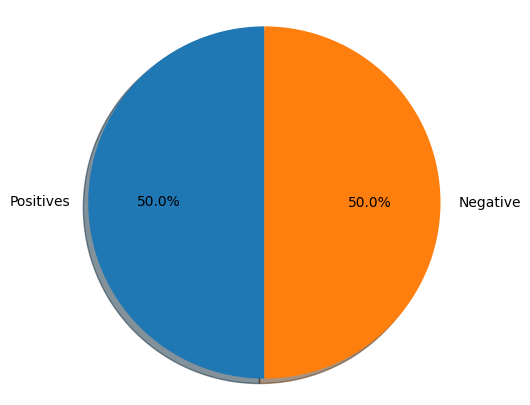

In [10]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

Looking at raw texts
Before anything else, we can print a couple of tweets from the dataset to see how they look.
Below, we will print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two.

In [11]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@Bhoxzniall fback? :)
@badoeuf If going to stop breakfast early you might want to remove the 11am from your website. Even McD's doesn't pull that trick. :(


One observation is that many of the tweets have emotional icons and URLs present.


## **DATA PREPROCESSING**
Remove noise: We will first remove noise from our data -- that is, remove words that don't tell you much about the content. These include all common words like 'I, you, are, is, etc...' that would not give us enough information on the sentiment.
We'll also remove stock market tickers, retweet symbols, hyperlinks, and hashtags because they can not tell us a lot of information on the sentiment.
We will also remove all the punctuation from a tweet. The reason for doing this is because we want to treat words with or without the punctuation as the same word, instead of treating "happy", "happy?", "happy!", "happy," and "happy." as different words.
Finally we will use stemming to only keep track of one variation of each word. In other words, we'll treat "motivation", "motivated", and "motivate" similarly by grouping them within the same stem of "motiv-".

Here the preprocessing steps are comprised of the following tasks:
1.   Tokenizing the string
2.   Lowercasing
3.   Removing stop words and punctuation
4.   Stemming


In [12]:
# Our selected example is complex enough to exemplify each step mentioned above.
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Let's import a few more libraries for this purpose.

In [13]:
# download the stopwords from NLTK
nltk.download('stopwords')
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **Remove hyperlinks, Twitter marks and styles**
Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the re library to perform regular expression operations on our tweet. We'll define our search pattern and use the sub() method to remove matches by substituting with an empty character (i.e. '')

In [14]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### **Tokenize the string**
To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The tokenize module from NLTK allows us to do these easily:

In [15]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### **Remove stop words and punctuations**
The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [17]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

For the punctuation, we saw earlier that certain groupings like ':)' and '...' should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!


In [18]:

print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### **Stemming**
Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:



*   learn
*   learning
*   learned
*   learnt



All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

*   happy
*   happiness
*   happier

We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

NLTK has different modules for stemming and we will be using the PorterStemmer module which uses the Porter Stemming Algorithm. Let's see how we can use it in the cell below.

In [19]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


Now we have a set of words we can feed into to the next stage of our project.



### **process_tweet()**
As shown above, preprocessing consists of multiple steps before you arrive at the final list of words. We will now implement a function process_tweet(tweet) by which we will  obtain the same result as in the previous code cells,but it will be much easier to do as we will only need to call the function process_tweet().

In [20]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean




In [21]:
# choosing the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# calling the function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


## **FEATURE ENGINEERING**
Given a list of tweets, we will extract relevant features and store them in a matrix. We will extract two features.
*   The first feature is the number of positive words in a tweet.
*   The second feature is the number of negative words in a tweet.



build_freqs(): this counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label '1' or a negative label '0', then builds the freqs dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.

Input: tweets: a list of tweets ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)

Output: freqs: a dictionary mapping each (word, sentiment) pair to its frequency

In [22]:
def build_freqs(tweets, ys):
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


### **Implementing the extract_features function.**
*   This function takes in a single tweet.
*   Process the tweet using the process_tweet() function and save the list of tweet words.
*   Loop through each word in the list of processed words
*   For each word, check the freqs dictionary for the count when that word has a positive '1' label.
*   We Do the same for the count for when the word is associated with the negative label '0'.

In [23]:
def extract_features(tweet, freqs):
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)

    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1
    for word in word_l:

        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0), 0)

        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0), 0)
    assert(x.shape == (1, 3))
    return x

In [24]:
tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists.
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

In [25]:
#Train test split: 20% will be in the test set, and 80% in the training set.
# spliting the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]
train_x = train_pos + train_neg

print("Number of tweets: ", len(train_x))
test_x = test_pos + test_neg

Number of tweets:  8000


In [26]:
# Creating the numpy array of positive labels and negative labels.
# combining positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)
# Printing the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [27]:
# creating frequency dictionary
freqs = build_freqs(train_x, train_y)
# testing on training data
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)


[[1.00e+00 3.02e+03 6.10e+01]]


## **EXPLORATORY DATA ANALYSIS**
Ploting tweets in a scatter plot using their positive and negative sums.

In [28]:
#loading data

data= np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    data[i, :]= extract_features(train_x[i], freqs)
#print(data)
data.shape

(8000, 3)

In [29]:
#for visualizing
# Creating label column
label = np.concatenate((np.ones((4000, 1)), np.zeros((4000, 1))), axis=0)
# Concatenate data with label column
data_with_bias = np.concatenate((data, label), axis=1)
# Convert to pandas DataFrame
df = pd.DataFrame(data_with_bias, columns=['bias','positive', 'negative', 'sentiment'])

# Display the DataFrame
print(df.head())
print(df.tail(10))


   bias  positive  negative  sentiment
0   1.0    3020.0      61.0        1.0
1   1.0    3573.0     444.0        1.0
2   1.0    3005.0     115.0        1.0
3   1.0    2862.0       4.0        1.0
4   1.0    3119.0     225.0        1.0
      bias  positive  negative  sentiment
7990   1.0     500.0     482.0        0.0
7991   1.0     919.0    4595.0        0.0
7992   1.0     119.0     138.0        0.0
7993   1.0     252.0    4043.0        0.0
7994   1.0      31.0    3959.0        0.0
7995   1.0      29.0    3706.0        0.0
7996   1.0      62.0     323.0        0.0
7997   1.0     144.0     783.0        0.0
7998   1.0     205.0    3890.0        0.0
7999   1.0     189.0    3974.0        0.0


In [30]:
df.describe()

,bias,positive,negative,sentiment
count,8000.0,8000.000000,8000.00000,8000.000000
mean,1.0,1345.245000,1941.19275,0.500000
std,0.0,1543.201222,2043.90505,0.500031
min,1.0,0.000000,0.00000,0.000000
25%,1.0,118.000000,143.00000,0.000000
50%,1.0,531.000000,578.50000,0.500000
75%,1.0,2944.000000,3823.00000,1.000000
max,1.0,22847.000000,22217.00000,1.000000


In [31]:
unique_counts = df.nunique()

print(unique_counts)

bias            1
positive     1920
negative     1672
sentiment       2
dtype: int64


In [32]:
for column in df:
        print("Column"," ",column,"  uniquevalue are :", df[column].nunique())
        print(df[column].unique())
        print("------------------------------------------------------------------")


Column   bias   uniquevalue are : 1
[1.]
------------------------------------------------------------------
Column   positive   uniquevalue are : 1920
[3020. 3573. 3005. ... 1495.  450.  433.]
------------------------------------------------------------------
Column   negative   uniquevalue are : 1672
[  61.  444.  115. ... 4648. 4330.  783.]
------------------------------------------------------------------
Column   sentiment   uniquevalue are : 2
[1. 0.]
------------------------------------------------------------------


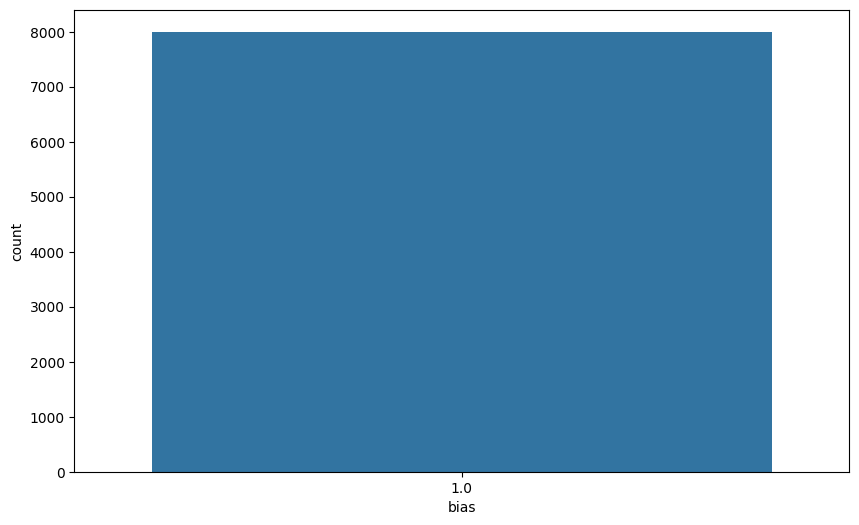

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x="bias", data=df)
plt.show()

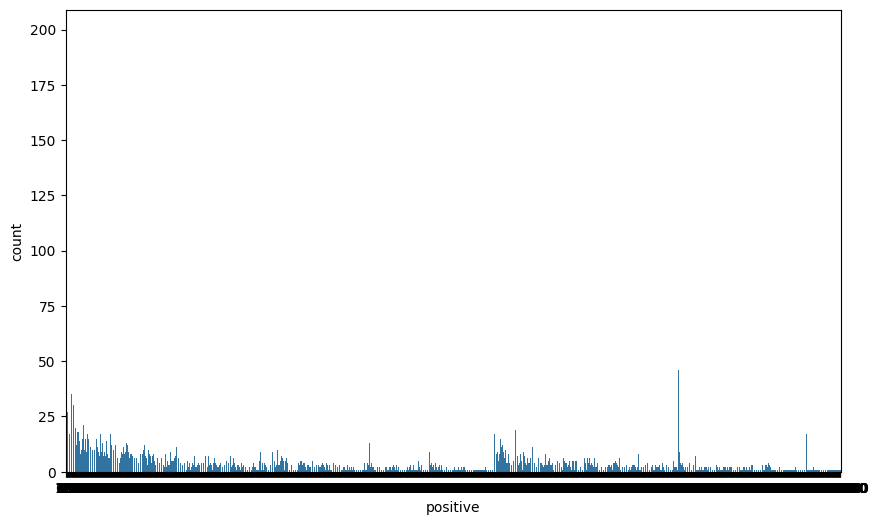

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x="positive", data=df)
plt.show()

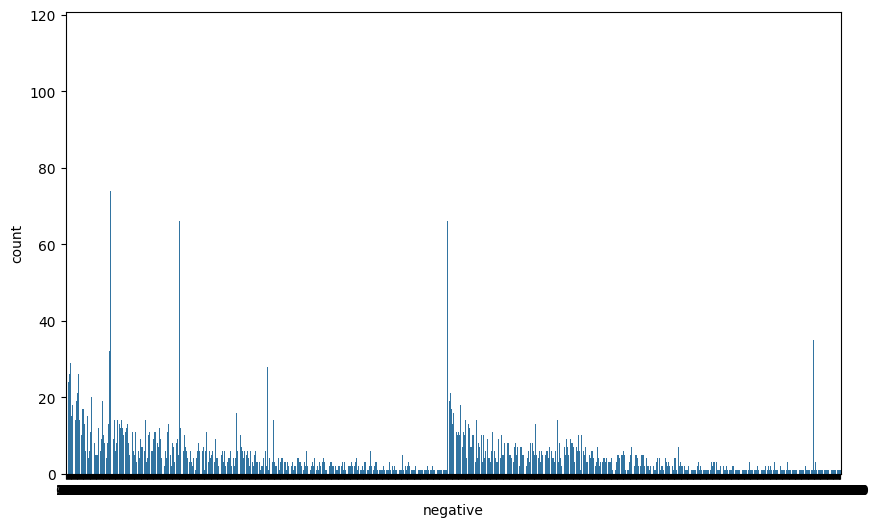

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x="negative", data=df)
plt.show()

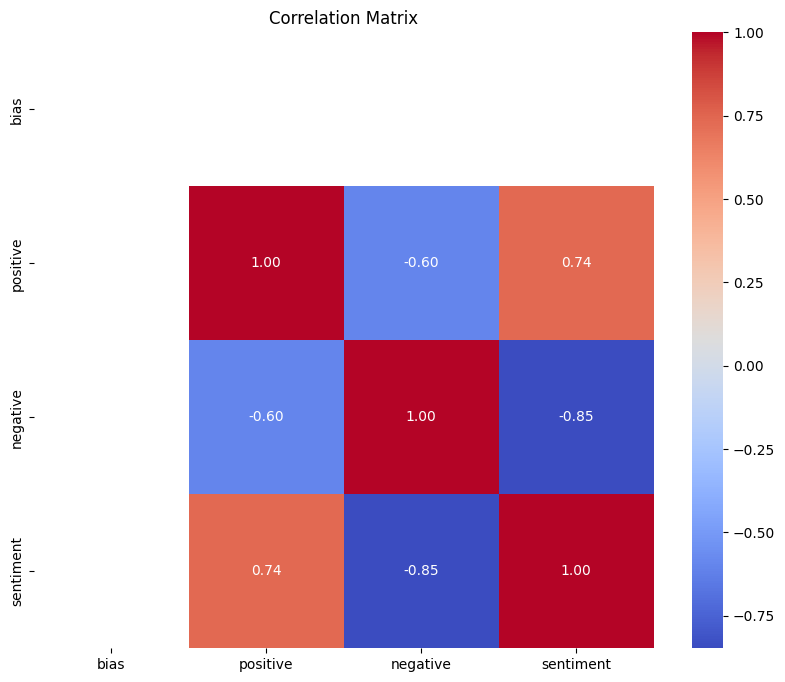

In [36]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Each feature is labeled as bias, positive and negative
X = df[['bias', 'positive', 'negative']].values # Get only the numerical values of the dataframe
Y = df['sentiment'].values; # Put in Y the corresponding labels or sentiments

#print(X.shape) # Print the shape of the X part
#print(X) # Print some rows of X

### **Plot the samples in a scatter plot**

Text(0, 0.5, 'Negative')

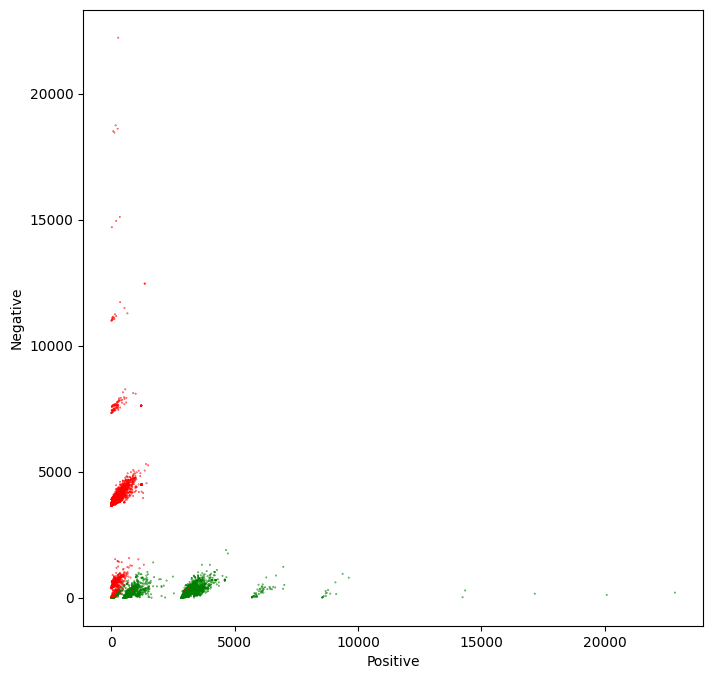

In [38]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# **LOGISTIC REGRESSION FOR SENTIMENT ANALYSIS**
### **MODEL BUILDING**

### **WITHOUT PYTHON PACKAGE**

### **Implementing the sigmoid function**

In [39]:
def sigmoid(z):
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    return h


## **Implementing gradient descent function**

In [40]:
def gradientDescent(x, y, theta, alpha, num_iters):
    # 'm', the number of rows in matrix x
    m = len(x)

    for i in range(0, num_iters):

        # z, the dot product of x and theta
        z = np.dot(x, theta)

        # the sigmoid of z
        h = sigmoid(z)

        # calculating the cost function
        J = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))

        # updating the weights theta
        theta = theta - (alpha / m) * (np.dot(x.T, (h - y)))
    J = float(J)
    return J, theta


### **TRAINING MODEL**

In [41]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Applying gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24215478.
The resulting vector of weights is [7e-08, 0.00052391, -0.00055517]


<ipython-input-40-3217d7e6f4b0>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


### **TESTING MODEL**
*   Predict whether a tweet is positive or negative.
*   Given a tweet, process it, then extract the features.
*   Apply the model's learned weights on the features to get the logits.
*   Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).

In [42]:
def predict_tweet(tweet, freqs, theta):
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)

    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x, theta))
    return y_pred

## **MODEL EVALUATION:**

In [43]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    # the list for storing predictions
    y_hat = []

    for tweet in test_x:
        # getting the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)

        if y_pred > 0.5:
            # appending 1.0 to the list
            y_hat.append(1.0)
        else:
            # appending 0 to the list
            y_hat.append(0.0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # converting both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (np.asarray(y_hat) == np.squeeze(test_y)).sum() / len(test_x)
    return accuracy
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


## **WITH PYTHON PACKAGE**


In [44]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
log_reg = LogisticRegression()
log_reg.fit(X,Y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## **MODEL EVALUATION:**

In [46]:
Xtest = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    Xtest[i, :]= extract_features(test_x[i], freqs)

# training labels corresponding to X
Ytest = test_y

In [60]:
# Predict sentiment labels for test data
y_pred = log_reg.predict(Xtest)

# Calculate accuracy
accuracy = accuracy_score(Ytest, y_pred)
print(f'Accuracy: {accuracy:.6f}')

# Classification report
print(classification_report(Ytest, y_pred))


Accuracy: 0.991500
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1000
         1.0       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Both implementations are giving high accuracy of 0.99, which is very good

# **NAIVE BAYES FOR SENTIMENT ANALYSIS**
Now we will be using Naive Bayes for sentiment analysis on tweets.Naive bayes is an algorithm that could be used for sentiment analysis. It takes a short time to train and also has a short prediction time.

## **WITHOUT PYTHON PACKAGE**


### **lookup()**
We will implement a lookup()function that takes in the freqs dictionary, a word, and a label (1 or 0) and returns the number of times that word and label tuple appears in the collection of tweets.

For example: given a list of tweets ["i am rather excited", "you are rather happy"] and the label 1, the function will return a dictionary that contains the following key-value pairs:

{ ("rather", 1): 2 ("happi", 1) : 1 ("excit", 1) : 1 }

In [48]:
def lookup(freqs, word, label):
    n = 0  # freqs.get((word, label), 0)

    pair = (word, label)
    if (pair in freqs):
        n = freqs[pair]

    return n

In [49]:
def train_naive_bayes(freqs, train_x, train_y):
    loglikelihood = {}
    logprior = 0
    # V is the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]

    #D: the number of documents
    D = len(train_y)

    #D_pos: the number of positive documents 
    D_pos = len(list(filter(lambda x: x > 0, train_y)))

    #D_neg, the number of negative documents 
    D_neg = len(list(filter(lambda x: x <= 0, train_y)))
    logprior = np.log(D_pos) - np.log(D_neg)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = lookup(freqs, word, 1)
        freq_neg = lookup(freqs, word, 0)

        #the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        #the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos / p_w_neg)


    return logprior, loglikelihood

logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))


0.0
9085


### **naive_bayes_predict**
*   The function takes in the tweet, logprior, loglikelihood.
*   It returns the probability that the tweet belongs to the positive or negative class.
*   For each tweet, sum up loglikelihoods of each word in the tweet.
*   Also add the logprior to this sum to get the predicted sentiment of that tweet.


In [50]:

def naive_bayes_predict(tweet, logprior, loglikelihood):
    
    # process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # initialize probability to zero
    p = 0

    # add the logprior
    p += logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]


    return p

my_tweet = 'She smiled.'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1.5737244858565678


### **test_naive_bayes()**
test_naive_bayes is to check the accuracy of our predictions.
*   The function takes in our test_x, test_y, log_prior, and loglikelihood
*   It returns the accuracy of our model.
*   First,  we will use naive_bayes_predict function to make predictions for each tweet in test_x.


In [51]:
def test_naive_bayes(test_x, test_y, logprior, loglikelihood, naive_bayes_predict=naive_bayes_predict):
   
    accuracy = 0  
   
    y_hats = []
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.absolute(y_hats-test_y))
    accuracy = 1-error
    return accuracy


In [52]:
# get the sets of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

# avoid assumptions about the length of all_positive_tweets
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [53]:
print("Naive Bayes accuracy = %0.4f" %
      (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

Naive Bayes accuracy = 0.9940


## **Error Analysis**
In this part we will see some tweets that our model missclassified.

In [54]:
# error analysis
print('Truth Predicted Tweet')
for x, y in zip(test_x, test_y):
    y_hat = naive_bayes_predict(x, logprior, loglikelihood)
    if y != (np.sign(y_hat) > 0):
        print('%d\t%0.2f\t%s' % (y, np.sign(y_hat) > 0, ' '.join(
            process_tweet(x)).encode('ascii', 'ignore')))

Truth Predicted Tweet
1	0.00	b''
1	0.00	b'truli later move know queen bee upward bound movingonup'
1	0.00	b'new report talk burn calori cold work harder warm feel better weather :p'
1	0.00	b'harri niall 94 harri born ik stupid wanna chang :d'
1	0.00	b''
1	0.00	b''
1	0.00	b'park get sunlight'
1	0.00	b'uff itna miss karhi thi ap :p'
0	1.00	b'hello info possibl interest jonatha close join beti :( great'
0	1.00	b'u prob fun david'
0	1.00	b'pat jay'
0	1.00	b'whatev stil l young >:-('


## **Predicting our own tweet**
In this part we can predict the sentiment of our own tweet.

In [55]:
my_tweet = 'I am happy because I am learning :)'

p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print(p)

9.57385883169329


## **WITH PYTHON PACKAGE IMPLEMENTATION**

In [56]:
Xtest = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    Xtest[i, :]= extract_features(test_x[i], freqs)

# training labels corresponding to X
Ytest = test_y

In [57]:
Xtrain = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    Xtrain[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Ytrain = train_y

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Initialize Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the model
naive_bayes.fit(Xtrain, Ytrain)

# Predict sentiment labels for test data
y_pred = naive_bayes.predict(Xtest)


## **MODAL EVALUATION**

In [59]:

# Calculate accuracy
accuracy = accuracy_score(Ytest, y_pred)
print(f'Accuracy: {accuracy:.6f}')

# Classification report
print(classification_report(Ytest, y_pred))


Accuracy: 0.995000
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1000
         1.0       0.99      1.00      1.00      1000

    accuracy                           0.99      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      0.99      0.99      2000



# **SUMMARY**

### **Logistic Regression Model:**
- **Accuracy:** 0.9915
- **Precision, Recall, F1-score:**
  - Class 0 (negative sentiment): Precision = 0.99, Recall = 0.99, F1-score = 0.99
  - Class 1 (positive sentiment): Precision = 0.99, Recall = 0.99, F1-score = 0.99
- **Insights:** The logistic regression model achieves high accuracy and balanced performance across both classes. It shows robustness in predicting both positive and negative sentiments with equally high precision, recall, and F1-score.

### **Naive Bayes Model:**
- **Accuracy:** 0.9950
- **Precision, Recall, F1-score:**
  - Class 0 (negative sentiment): Precision = 1.00, Recall = 0.99, F1-score = 0.99
  - Class 1 (positive sentiment): Precision = 0.99, Recall = 1.00, F1-score = 1.00
- **Insights:** The naive Bayes model performs slightly better than logistic regression, especially in terms of precision for class 0 (negative sentiment) and recall for class 1 (positive sentiment). It achieves high accuracy and near-perfect F1-scores due to its assumption of feature independence.

###**Comparison and Recommendations:**
- Both models perform exceptionally well with accuracies above 99%, indicating strong predictive power for sentiment analysis.
- Naive Bayes shows a slight edge in performance metrics, likely due to its simplicity and the assumption of feature independence, which might align well with the nature of tweet sentiment analysis where words often appear independently.It takes a short time to train and also has a short prediction time.
- **Limitations:**
  - Naive Bayes assumes feature independence, which might not hold true in all cases, especially with complex language patterns in tweets.
  - Both models might struggle with sarcasm, irony, or nuanced sentiments that require deeper contextual understanding.
  - Imbalanced datasets or specific linguistic styles could impact model performance.
  
### Suggestions for Improvements:
- **Feature Engineering:** Explore more sophisticated text preprocessing techniques, such as handling emojis, slang, or special characters, to enhance model understanding of informal language.
- **Model Selection:** Consider ensemble methods like Random Forests or Gradient Boosting, which can capture nonlinear relationships and dependencies in the data better than Naive Bayes or logistic regression.
- **Contextual Embeddings:** Utilize pre-trained word embeddings (e.g., Word2Vec, GloVe) or contextual embeddings (e.g., BERT, GPT) to capture richer semantic meanings and contextual dependencies in tweets.
- **Fine-tuning:** Experiment with hyperparameter tuning for both models to optimize performance further, ensuring robustness across different evaluation metrics.

### Conclusion:
In conclusion, both logistic regression and naive Bayes models demonstrate strong performance in sentiment analysis of tweets, achieving high accuracies and balanced metrics across classes. Naive Bayes, with its simplicity and effective handling of independent features, slightly outperforms logistic regression in this context. However, improvements can be made by considering more advanced models and enhancing feature engineering techniques to better capture the nuances of tweet sentiment.